## Ec Poisson en cilindricas 1D
En este notebook juego con la ecuación 
\begin{equation}
\Delta \psi = \frac{1}{\rho}\partial_{\rho}(\rho \partial_{\rho} \psi)= F
\end{equation}
Donde $F$, la fuente, toma distintos valores. Exploro las posibles soluciones generales y testeo las cond de borde que necesito utilizar en mi codigo general. Las mismas son Neumann homogeneo en el origen y Robin "inhomogeneo" en el borde exterior.

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  Atom == false
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh

In [3]:
L = 20.
model = GmshDiscreteModel("modelos/1DD.msh")

Info    : Reading 'modelos/1DD.msh'...
Info    : 3 entities
Info    : 9213 nodes
Info    : 9214 elements
Info    : Done reading 'modelos/1DD.msh'


UnstructuredDiscreteModel()

In [4]:
Ω = Triangulation(model)
degree = 3
dΩ = Measure(Ω,degree)

Measure()

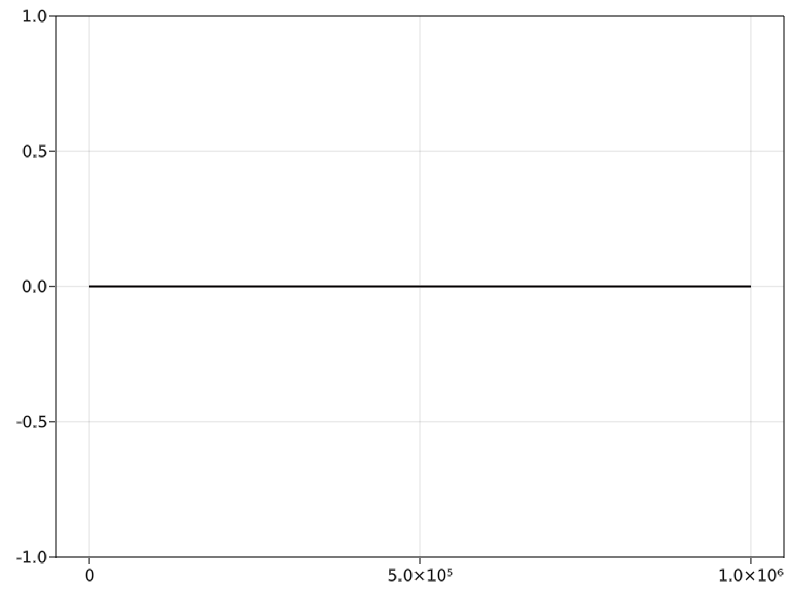

In [5]:
if Atom == false 
    fig, ax = plot(Ω)
    #scatter!(Ω, marker=:star8, markersize=4, color=:blue)
    wireframe!(Ω, color=:black, linewidth=2)
    fig
end

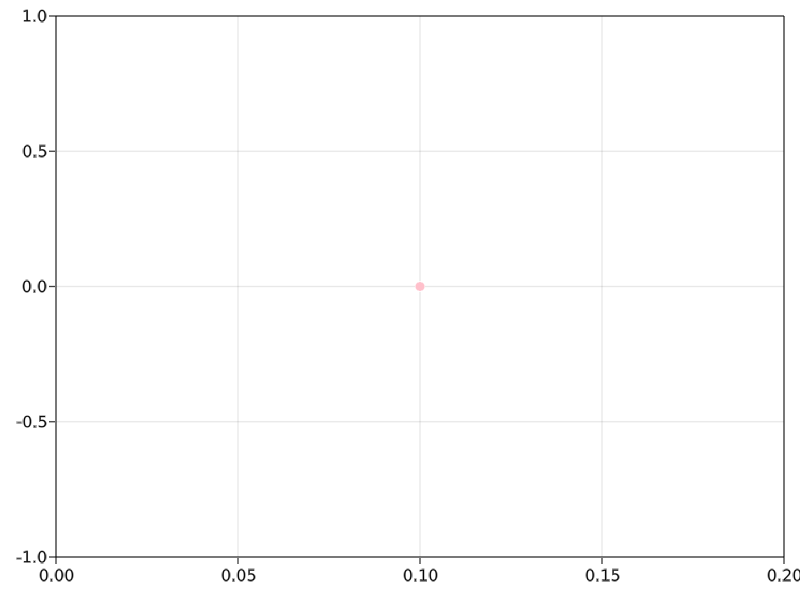

In [6]:
neumanntags_L= ["left"]
Γ_L = BoundaryTriangulation(model,tags=neumanntags_L)
dΓ_L = Measure(Γ_L,degree)
if Atom == false 
    fig = plot(Γ_L, linewidth=8
    #, shading=true
    )
end

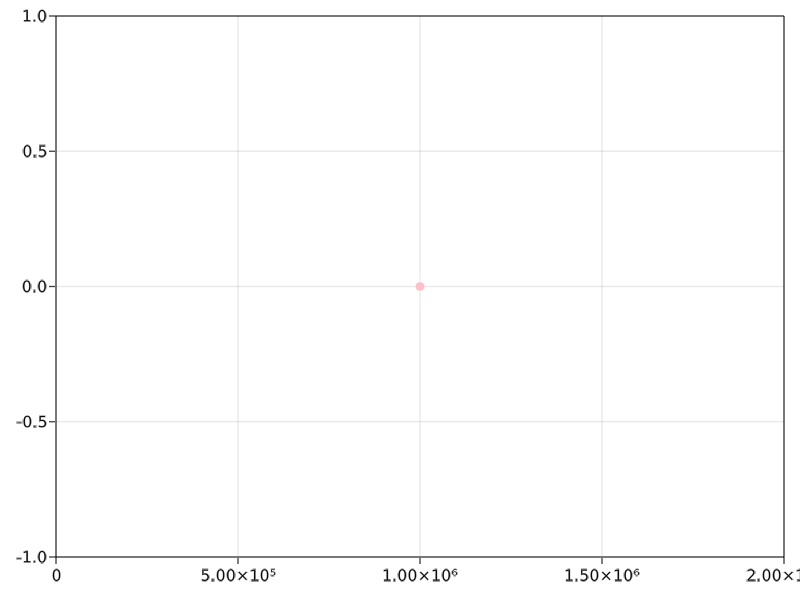

In [7]:
neumanntags_R= ["right"]
Γ_R = BoundaryTriangulation(model,tags=neumanntags_R)
dΓ_R = Measure(Γ_R,degree)
if Atom == false 
    fig = plot(Γ_R, linewidth=8
    #, shading=true
    )
end

In [8]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)

(Lagrangian(), (Float64, 2), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

In [9]:
dirichlet_tags= [ "left","right"]
ue(x)= log(x[1])
dirichlet_values = [ue,ue]

2-element Vector{typeof(ue)}:
 ue (generic function with 1 method)
 ue (generic function with 1 method)

In [10]:
VD = TestFESpace(model,reffe,conformity=:H1,dirichlet_tags = dirichlet_tags)
UD = TrialFESpace(VD,dirichlet_values)

TrialFESpace()

In [11]:
ρ(x)=x[1]
uconst(x)=1.

uconst (generic function with 1 method)

In [12]:
#Cond de Newman borde izq
c(x)=0.

c (generic function with 1 method)

In [33]:
a(u,v) = ∫(- (∇(v)⋅∇(u))* ρ )*dΩ #+ ∫( -v *(u- 1.) )*dΓ_R
b(v) = 0.

b (generic function with 1 method)

In [34]:
op = AffineFEOperator(a,b,UD,VD)

AffineFEOperator()

In [35]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [36]:
 seed(x)=1. +1/ρ(x)
w02=interpolate_everywhere(ue,UD)

SingleFieldFEFunction():
 num_cells: 9212
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17405807317247505073

In [37]:
uh, = solve!(w02,solver,op)

(SingleFieldFEFunction(), LUNumericalSetup())

In [38]:
writevtk(Ω,"resultados/f_LaplacianoDiri",cellfields=["u"=>uh])

(["resultados/f_LaplacianoDiri.vtu"],)

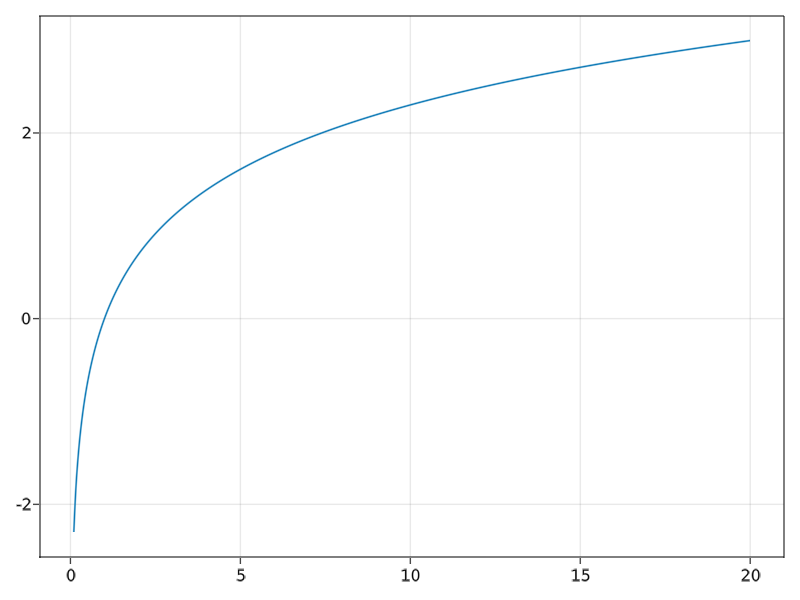

In [39]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uh,Gridap.Point.(x)), label= "u")


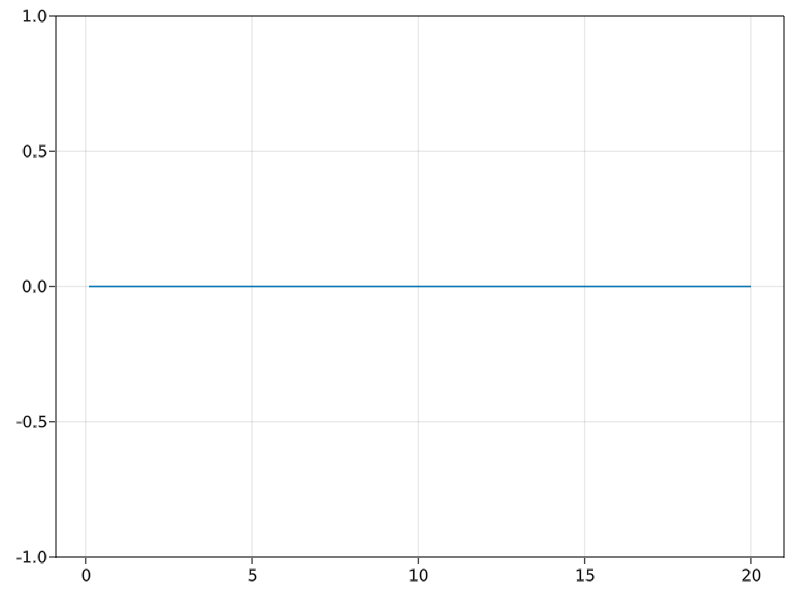

In [40]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uh-w02,Gridap.Point.(x)), label= "u")


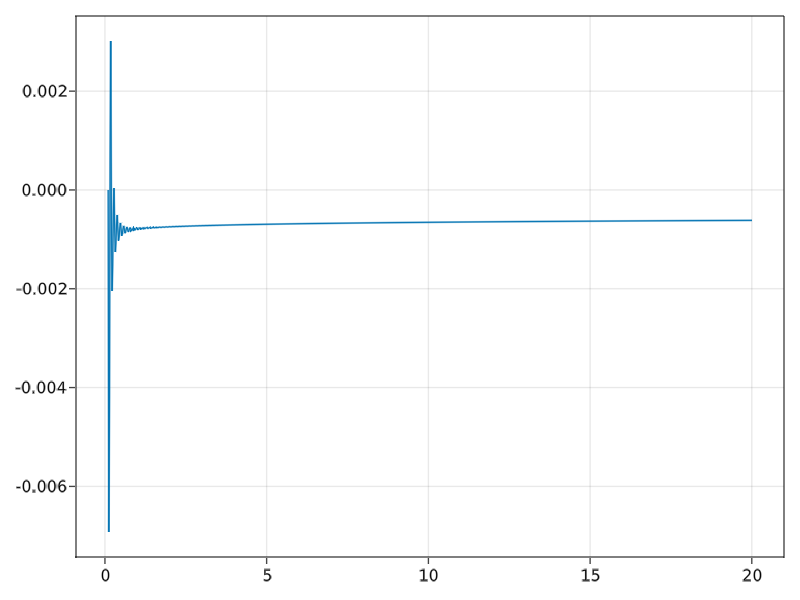

In [42]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uh-ue,Gridap.Point.(x)), label= "u")


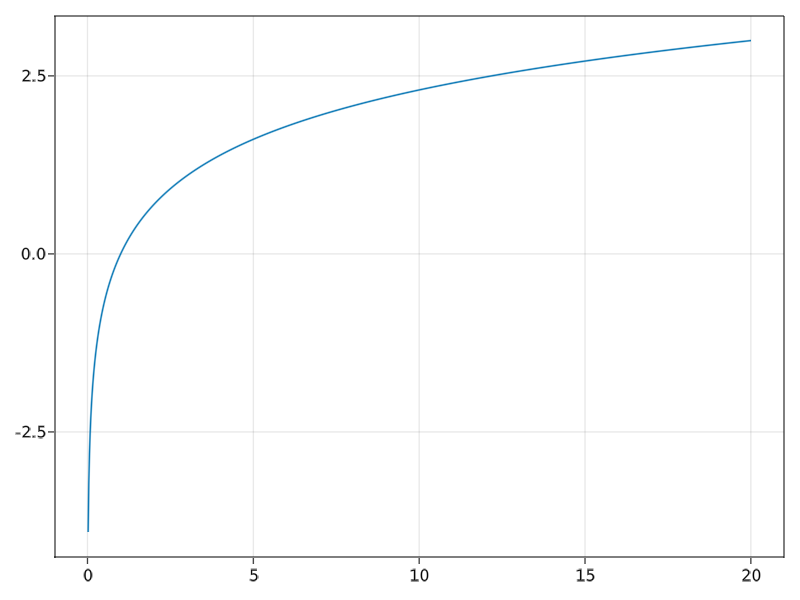

In [43]:
x = range(0.0, L, length=1000)
lines(x,ue, label= "exact")

### Cond de Robin y Neuman en la recta hasta el origen

In [53]:
L1 = 20.
model1 = GmshDiscreteModel("modelos/1D.msh")

Info    : Reading 'modelos/1D.msh'...
Info    : 3 entities
Info    : 20001 nodes
Info    : 20002 elements
Info    : Done reading 'modelos/1D.msh'


UnstructuredDiscreteModel()

In [54]:
Ω1 = Triangulation(model1)
degree = 3
dΩ1 = Measure(Ω1,degree)

Measure()

In [55]:
neumanntags_LC= ["left"]
Γ_LC = BoundaryTriangulation(model1,tags=neumanntags_LC)
dΓ_LC = Measure(Γ_LC,degree)

Measure()

In [56]:
neumanntags_RC= ["right"]
Γ_RC = BoundaryTriangulation(model1,tags=neumanntags_RC)
dΓ_RC = Measure(Γ_RC,degree)

Measure()

In [73]:
V = TestFESpace(model1,reffe,conformity=:H1)
    #vector_type=Vector{Float64}
U = TrialFESpace(V)

UnconstrainedFESpace()

In [91]:
aC(w,q) = ∫(- (∇(q)⋅∇(w))* ρ )*dΩ1 + ∫( -q *(w - 1.) )*dΓ_RC
bC(q) = ∫(- q * c *ρ)* dΓ_LC

bC (generic function with 1 method)

In [92]:
opp= AffineFEOperator(aC,bC,U,V)

AffineFEOperator()

In [93]:
w02const=interpolate_everywhere(uconst,U)

SingleFieldFEFunction():
 num_cells: 20000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 13088384873130894142

In [94]:
uhconst, = solve!(w02const,solver,opp)

(SingleFieldFEFunction(), LUNumericalSetup())

In [95]:
writevtk(Ω1,"resultados/f1D_const",cellfields=["u"=>uhconst])

(["resultados/f1D_const.vtu"],)

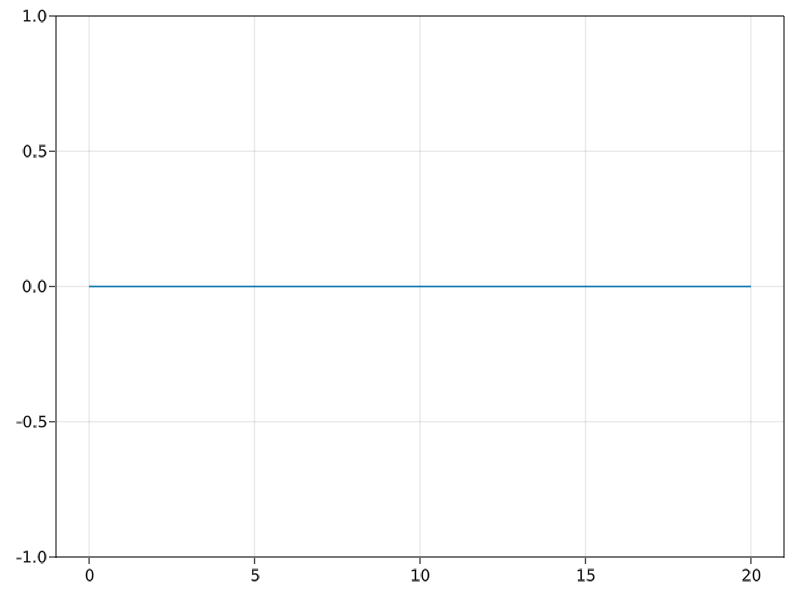

In [96]:
x = range(0., L1, length=1000)
lines(x, evaluate(uhconst,Gridap.Point.(x)), label= "u")

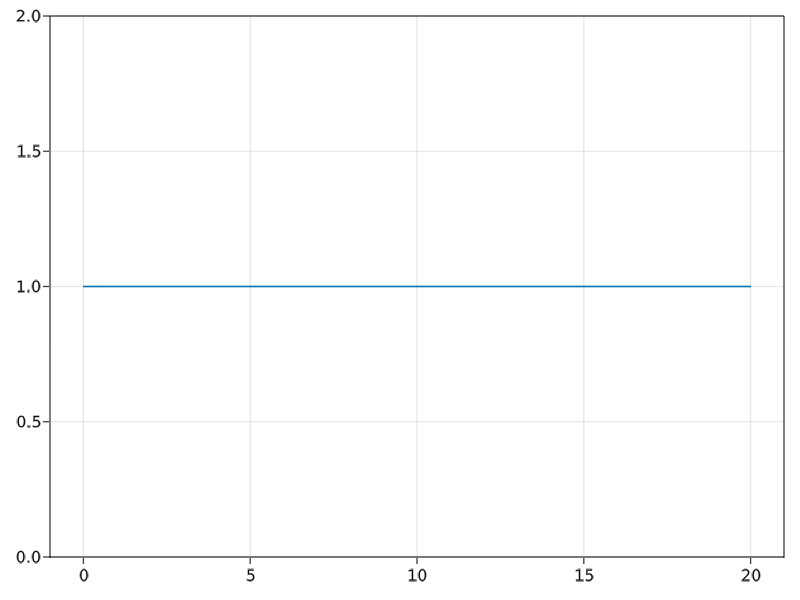

In [97]:
x = range(0., L1, length=1000)
lines(x, uconst, label= "u")

### Problema con fuente + cond de Newmann homogenea en el borde izq


In [41]:
α=2.
B=1.
ue_f(x)=B+(x[1]^(α+1))/(α+1)^2 #sol exacta 
f(x)=x[1]^(α-1) #fuente

f (generic function with 1 method)

In [57]:
dirichlet_tags_FN= [ "right"]
dirichlet_values_FN = [ue_f]

1-element Vector{typeof(ue_f)}:
 ue_f (generic function with 1 method)

In [58]:
VFN = TestFESpace(model1,reffe,conformity=:H1,dirichlet_tags = dirichlet_tags_FN)
UFN= TrialFESpace(VFN,dirichlet_values_FN)

TrialFESpace()

In [59]:
a1(u,v) = ∫(- (∇(v)⋅∇(u))* ρ )*dΩ1 #+ ∫( -v *(u- 1.) )*dΓ_I
b1(v) =∫(f*v*ρ)*dΩ1+ ∫( -v *ρ*c )*dΓ_LC

b1 (generic function with 1 method)

In [60]:
op1 = AffineFEOperator(a1,b1,UFN,VFN)

AffineFEOperator()

In [61]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [62]:
w0_f=interpolate_everywhere(ue_f,UFN)

SingleFieldFEFunction():
 num_cells: 20000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 916622676766112566

In [63]:
uhf,= solve!(w0_f,solver,op1)

(SingleFieldFEFunction(), LUNumericalSetup())

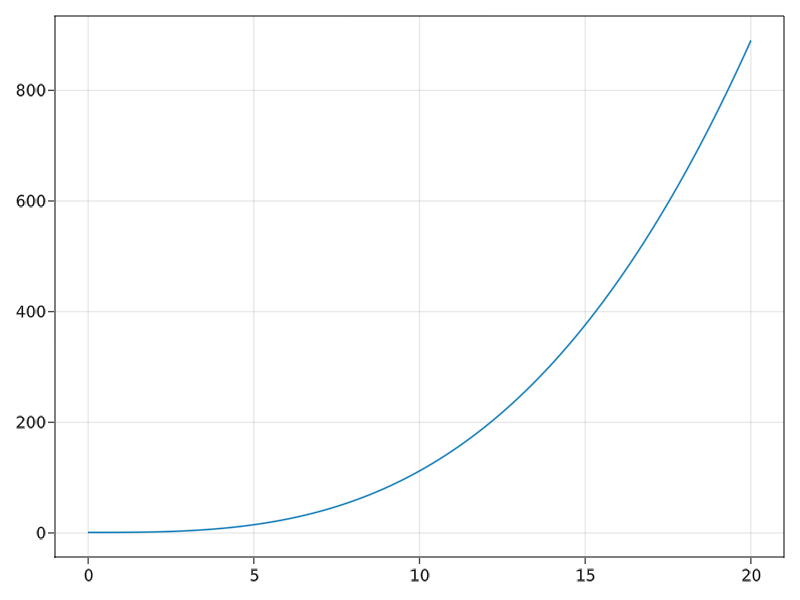

In [66]:
x = range(0., L, length=1000)
lines(x, evaluate(uhf,Gridap.Point.(x)), label= "u")

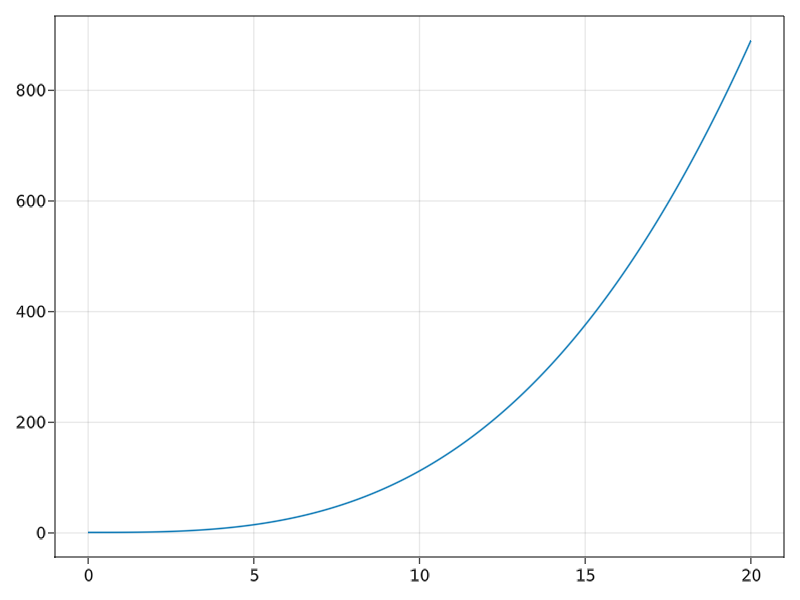

In [67]:
x = range(0, L, length=1000)
lines(x,ue_f, label= "exact")

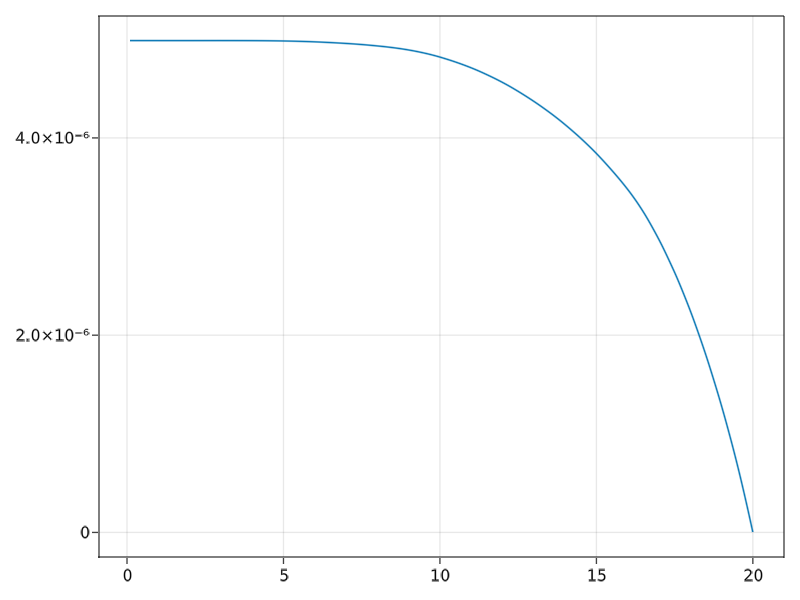

In [68]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uhf-ue_f,Gridap.Point.(x)), label= "u")

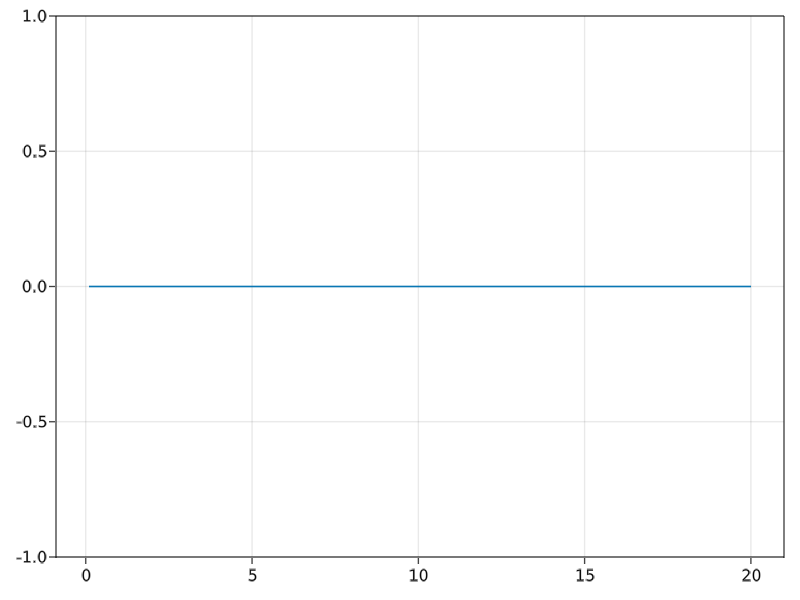

In [69]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uhf-w0_f,Gridap.Point.(x)), label= "u")

### Problema con fuente + cond de "Robin" inhomogenea en el borde derecho


In [22]:
α=-2
B=1.
ue_f(x)=B+(x[1]^(α+1))/(α+1)^2 #sol exacta 
f(x)=x[1]^(α-1) #fuente

f (generic function with 1 method)

In [30]:
dirichlet_tags_FR= [ "left"]
dirichlet_values_FR = [ue_f]

1-element Vector{typeof(ue_f)}:
 ue_f (generic function with 1 method)

In [85]:
VFR = TestFESpace(model,reffe,conformity=:H1,dirichlet_tags = dirichlet_tags_FR)
UFR= TrialFESpace(VFR,dirichlet_values_FR)

TrialFESpace()

In [86]:
a2(u,v) = ∫(- (∇(v)⋅∇(u))* ρ )*dΩ + ∫( -v *(u- 1.) )*dΓ_R
b2(v) =∫(f*v*ρ)*dΩ#+ ∫( -v *ρ*c )*dΓ_L

b2 (generic function with 1 method)

In [87]:
op2 = AffineFEOperator(a2,b2,UFR,VFR)

AffineFEOperator()

In [88]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [89]:
w0_f=interpolate_everywhere(ue_f,UFR)

SingleFieldFEFunction():
 num_cells: 9212
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2240493763952452914

In [90]:
uhf1,= solve!(w0_f,solver,op2)

(SingleFieldFEFunction(), LUNumericalSetup())

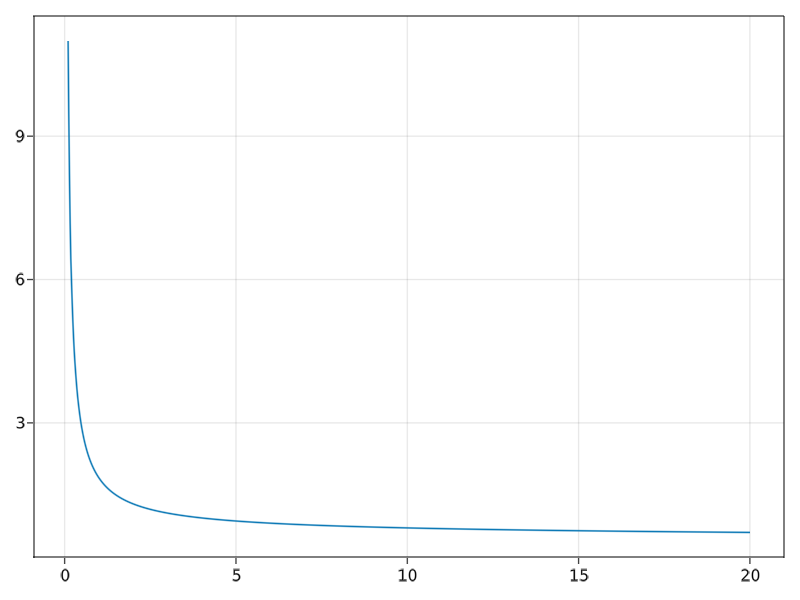

In [91]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uhf1,Gridap.Point.(x)), label= "u")

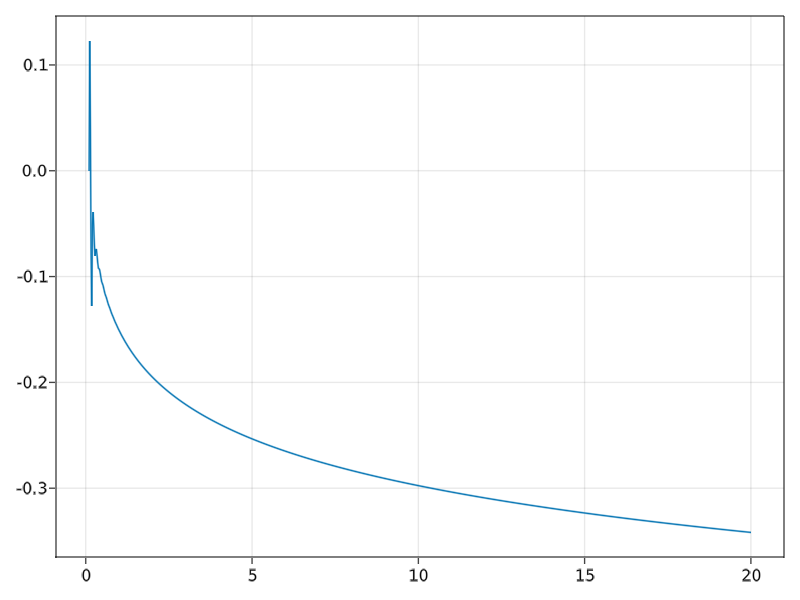

In [92]:
x = range(0.1, L, length=1000)
lines(x, evaluate(uhf1-ue_f,Gridap.Point.(x)), label= "u")

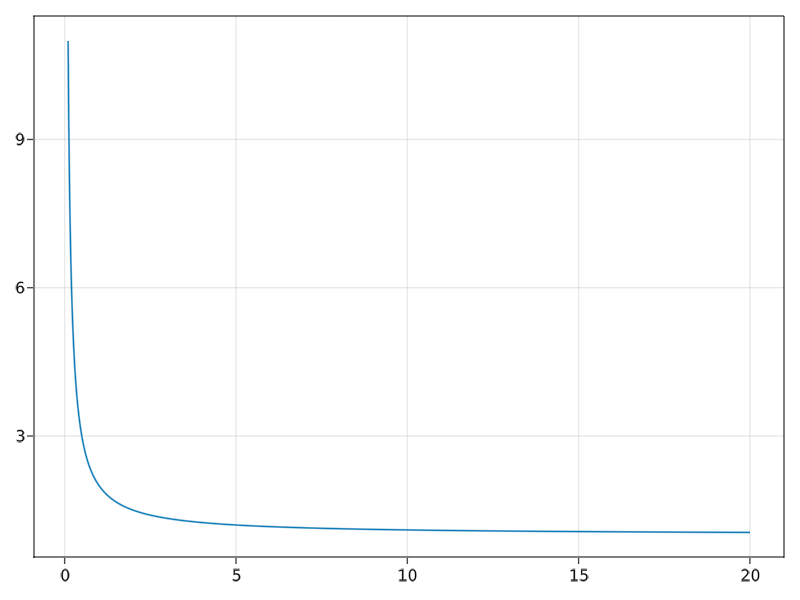

InterruptException:
Stacktrace:
  [1] poptask(W::Base.InvasiveLinkedListSynchronized{Task})
    @ Base ./task.jl:862
  [2] wait()
    @ Base ./task.jl:871
  [3] wait(c::Base.GenericCondition{Base.Threads.SpinLock})
    @ Base ./condition.jl:123
  [4] _trywait(t::Timer)
    @ Base ./asyncevent.jl:130
  [5] wait
    @ ./asyncevent.jl:147 [inlined]
  [6] sleep(sec::Float64)
    @ Base ./asyncevent.jl:232
  [7] fps_renderloop(screen::GLMakie.Screen, framerate::Float64)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:32
  [8] renderloop(screen::GLMakie.Screen; framerate::Float64)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:48
  [9] renderloop(screen::GLMakie.Screen)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:41
 [10] (::GLMakie.var"#50#52"{GLMakie.Screen})()
    @ GLMakie ./task.jl:429


In [93]:
x = range(0.1, L, length=1000)
lines(x,ue_f, label= "exact")